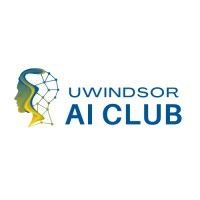

### What is Machine Learning
- "Machine Learning is the **semi-automated** extraction of **knowledge** from data"

#### Classification vs Regression
- **Classification**: want to identify data into a label or answer a yes/no question
    - e.g. determine spam or no spam
- **Regression**: identify an exact number as a result
    - predict someones height

### Dataset
Emails text and then a label indicating whether it is spam or not

| Spam? | Value |
| ------|-------|
| Spam  | 1 |
| Not Spam | 0 |


#### Data Layout
- In a pandas dataframe - which is basically like a table object to represent data

| text | spam |
|------|------|
| (String) | (Binary) |




In [ ]:
import pandas as pd

# Dataset
df = pd.read_csv('spam_email_dataset.csv')


print(df.head(1))


### Three Requirements for Data

#### Features and Targets...

1. must passed into the model as **separate** objects
2. should both be **numeric**
3. are expected to have certain shapes:
	1. Features - **2D array**
	2. Target - **1D array**


#### PROBLEM!!!
- the values under text are NOT type numeric
- how do we fix this??
	- We run the data through a vectorizer

### Data Preprocessing
- We have to convert the text data into something readable by the model
- Solution: CountVectorizer

#### Count Vectorizer
- will convert the text into many features that each represent the count of each word in the email.

e.g. 
s1: "Hello World"
s2: "Hello hello AI Club"

| doc | hello | world | ai | club |
| --- |  --- |  --- |  --- |  --- |
| s1 | 1 | 1 | 0 | 0 |
| s2 | 2 | 0 | 1 | 1 |

In [2]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',lowercase=True)

X = vectorizer.fit_transform(df['text'])
y= df['spam']


In [ ]:
i = 0
for key in vectorizer.vocabulary_.keys():
    print(f"{key} : {vectorizer.vocabulary_[key]}")
    if (i >= 10): break
    i += 1

print("\nFeatures:")
print(X)

print("\nTarget:")
print(y)



### Back to the Three Requirements...

1. must passed into the model as **separate** objects -> YES
2. should both be **numeric** -> YES
3. are expected to have certain shapes:
	1. Features - **2D array** -> YES (see X)
	2. Target - **1D array** -> YES (see y)


### Logistic Regression

#### What is linear regression
- suppose all the data are the points
- trying to find a line that best represents the data

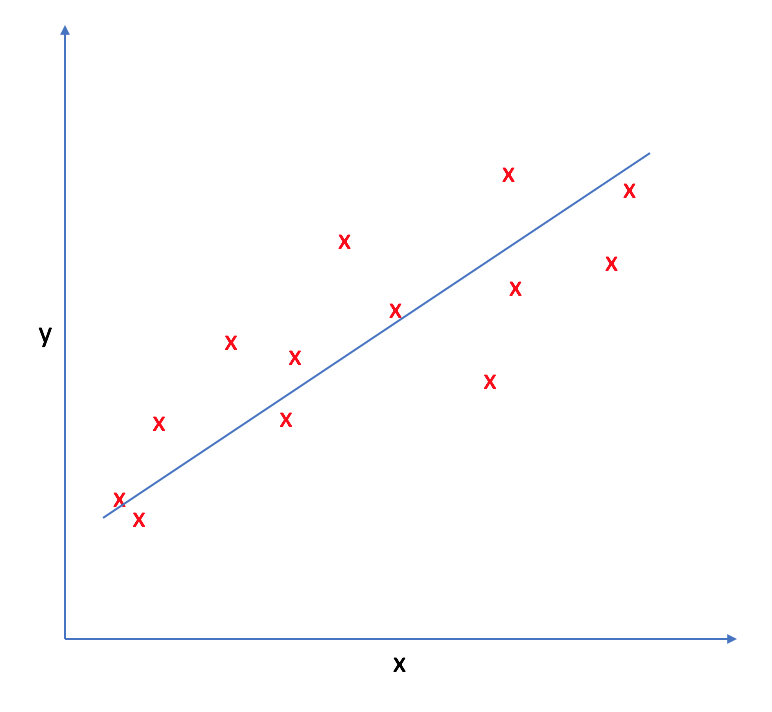

##### The line:
- y represents the prediction for a data point
- x_i represents the value for the ith feature
    - for example, suppose x_0 is the count for word "enron"
- w's and b are calculated in model training
- $y= w_0 * x_0 +w_1 * x_1 * .. + b$

##### Our problem
- linear regression can only be used for regression problems
- our spam detection is a classification problem
    - solution: use Logistic Regression 


#### How about logistic regression? 
- we are basically doing the same
- BUT now...
    - the result of y needs to be classified
    - y > 0 is spam, y < 0 is not spam






### Five Steps for Model Training for Accurate Training

#### 0. Load the Data and Complete Preprocessing
- preprocessing is to ensure the data works for machine learning

In [10]:
# Already complete
# Below is a summary on how to do it
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# Dataset
df = pd.read_csv('spam_email_dataset.csv')

vectorizer = CountVectorizer(stop_words='english',lowercase=True)

X = df['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


y= df['spam']

#### 1. Import the relevant class
- import the LogisticRegression class

In [11]:
from sklearn.linear_model import LogisticRegression

#### 2. Instantiate the estimator
- sci kit learn refers to it's models estimators because their primary role is to estimate unknown quantities
- we will start with default params

In [12]:
logRegModel = LogisticRegression(C=0.00001)


#### 3. Fit the model with data
- model is learning the relationship between X and y
- split is optional but will use it to test accuracy (30% test data is standard)

In [ ]:


# FORMAT: logRegModel.fit(feature matrix X, target vector y)
logRegModel.fit(X_train, y_train)

#### 4. Check Accuracy


In [ ]:
print(f"Testing Score: {logRegModel.score(X_train, y_train)}")
print(f"Training Score: {logRegModel.score(X_test, y_test)}")


#### 5. Adjust Hyperparameters
- we will be focused on C
    - larger C -> more complex model
    - lower C -> more simplified model


##### Overfitting 
- what? the model is too complex 
- detect? usually its when your training score is too high compared to testing score
- fix? decrease C

#### Underfitting
- what? the model is too simple
- detect? usually its when your training & testing score is too low
- fix? increase C


> Now, let's fix our model

### Export the model
- we can export the model into a .pkl file to be used in our webapp
- when we reuse the model, all preprocessing steps must be repeated
    - thus, we will also export our vectorizer as a .pkl

In [9]:
import pickle

pickle.dump(logRegModel, open("spam_detector_model.pkl", 'wb'))

pickle.dump(vectorizer, open("spam_detector_vectorizer.pkl", 'wb'))

# QUESTIONS?
Website: https://www.uwindsorai.club/

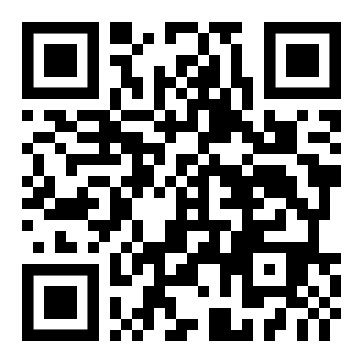
